In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('heart_disease.csv',header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [3]:
df=pd.DataFrame(data)

In [4]:
for i in range(0,14):
    a=df[i].value_counts()
    print('Column',i)
    print(a)

Column 0
63    15
62    15
55    14
60    12
58    12
61    12
57    10
64     9
56     9
69     8
59     8
54     7
51     7
65     6
74     5
67     5
53     5
68     4
48     4
72     3
66     3
75     3
40     2
46     2
50     2
49     2
41     2
52     2
71     2
42     1
37     1
38     1
77     1
43     1
44     1
45     1
76     1
70     1
35     1
Name: 0, dtype: int64
Column 1
1    194
0      6
Name: 1, dtype: int64
Column 2
4    131
3     47
2     14
1      8
Name: 2, dtype: int64
Column 3
?      56
120    16
130    15
140    10
150     9
110     9
160     8
122     6
142     5
136     4
134     4
170     4
126     4
128     4
144     4
124     4
158     3
132     3
112     2
155     2
180     2
125     2
138     2
154     2
104     2
152     2
116     2
102     1
178     1
106     1
156     1
190     1
127     1
172     1
96      1
118     1
146     1
100     1
135     1
114     1
0       1
Name: 3, dtype: int64
Column 4
0      49
?       7
220     4
203     4
258     4
  

Column no. 10,11,12 have 102, 198 & 166 missing value '?'.

Since the the column no. 10,11,12 have high percentage of missing value i.e 51%, 99% & 83% , we can drop the columns.

Column no. 3,4,7,8,5,9 have 56,7,53,53,7 & 56 missing values'?'. The missing value is considerable, thus we can treat the column for nan values.

In [5]:
df.drop({12,11,10},axis=1,inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,13
0,63,1,4,140,260,0,1,112,1,3,2
1,44,1,4,130,209,0,1,127,0,0,0
2,60,1,4,132,218,0,1,140,1,1.5,2
3,55,1,4,142,228,0,1,149,1,2.5,1
4,66,1,3,110,213,1,2,99,1,1.3,0
...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,1
196,62,1,1,?,139,0,1,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,2
198,58,1,4,?,385,1,2,?,?,?,0


We have dropped columns no. 10, 11 ,12

In [6]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values='?',strategy='most_frequent')
series={3,4,7,8,5,9}
for i in series:
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))

In [7]:
for i in (0,1,2,3,4,5,6,7,8,9,13):
    a=df[i].value_counts()
    print('Column',i)
    print(a)

Column 0
63    15
62    15
55    14
60    12
58    12
61    12
57    10
64     9
56     9
69     8
59     8
54     7
51     7
65     6
74     5
67     5
53     5
68     4
48     4
72     3
66     3
75     3
40     2
46     2
50     2
49     2
41     2
52     2
71     2
42     1
37     1
38     1
77     1
43     1
44     1
45     1
76     1
70     1
35     1
Name: 0, dtype: int64
Column 1
1    194
0      6
Name: 1, dtype: int64
Column 2
4    131
3     47
2     14
1      8
Name: 2, dtype: int64
Column 3
120    72
130    15
140    10
110     9
150     9
160     8
122     6
142     5
134     4
128     4
124     4
136     4
126     4
144     4
170     4
158     3
132     3
112     2
180     2
155     2
125     2
138     2
154     2
104     2
152     2
116     2
102     1
96      1
156     1
190     1
127     1
178     1
118     1
172     1
0       1
146     1
100     1
135     1
114     1
106     1
Name: 3, dtype: int64
Column 4
0      56
258     4
203     4
220     4
240     3
       ..
18

Thus , we verified there is no missing value '?' in the data.

In [8]:
colmn=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','num']
df.columns=colmn
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,63,1,4,140,260,0,1,112,1,3,2
1,44,1,4,130,209,0,1,127,0,0,0
2,60,1,4,132,218,0,1,140,1,1.5,2
3,55,1,4,142,228,0,1,149,1,2.5,1
4,66,1,3,110,213,1,2,99,1,1.3,0
...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,1
196,62,1,1,120,139,0,1,120,1,0,0
197,55,1,4,122,223,1,1,100,0,0,2
198,58,1,4,120,385,1,2,120,1,0,0


We have named the columns

In [9]:
df.dtypes

age          int64
sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
num          int64
dtype: object

There 5 integer type columns and 6 string type columns

Since all coulmns have numerical value,  we can change the data type to float

In [10]:
for i in df.columns:
    df[i]=df[i].astype(float)

In [11]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
num         float64
dtype: object

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,129.910000,172.490000,0.340000,0.735000,122.055000,0.740000,0.951000,1.520000
std,7.811697,0.171015,0.795701,19.280055,116.752497,0.474898,0.683455,18.876269,0.439735,1.110344,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-0.500000,0.000000
25%,55.000000,1.000000,3.000000,120.000000,0.000000,0.000000,0.000000,112.000000,0.000000,0.000000,0.000000
50%,60.000000,1.000000,4.000000,123.000000,214.000000,0.000000,1.000000,120.000000,1.000000,0.500000,1.000000
75%,64.000000,1.000000,4.000000,140.000000,254.500000,1.000000,1.000000,130.000000,1.000000,2.000000,3.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.000000,1.000000,4.000000,4.000000


In [13]:
from scipy.stats import zscore

In [14]:
z=np.abs(zscore(df))
df2=df[(z<3).all(axis=1)]

In [15]:
df2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,63.0,1.0,4.0,140.0,260.0,0.0,1.0,112.0,1.0,3.0,2.0
1,44.0,1.0,4.0,130.0,209.0,0.0,1.0,127.0,0.0,0.0,0.0
2,60.0,1.0,4.0,132.0,218.0,0.0,1.0,140.0,1.0,1.5,2.0
3,55.0,1.0,4.0,142.0,228.0,0.0,1.0,149.0,1.0,2.5,1.0
4,66.0,1.0,3.0,110.0,213.0,1.0,2.0,99.0,1.0,1.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...
193,62.0,1.0,4.0,158.0,170.0,0.0,1.0,138.0,1.0,0.0,1.0
194,46.0,1.0,4.0,134.0,310.0,0.0,0.0,126.0,0.0,0.0,2.0
197,55.0,1.0,4.0,122.0,223.0,1.0,1.0,100.0,0.0,0.0,2.0
198,58.0,1.0,4.0,120.0,385.0,1.0,2.0,120.0,1.0,0.0,0.0


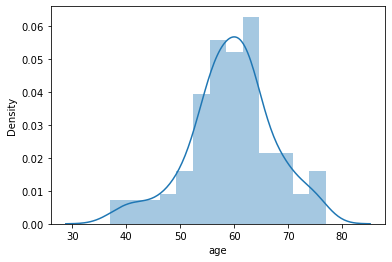

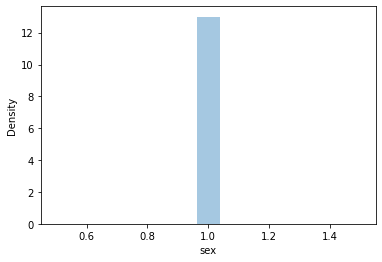

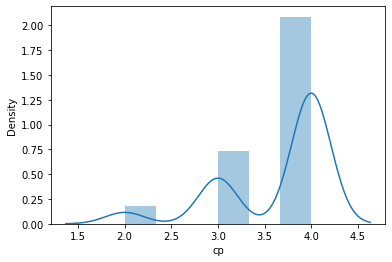

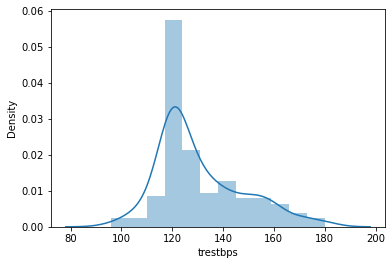

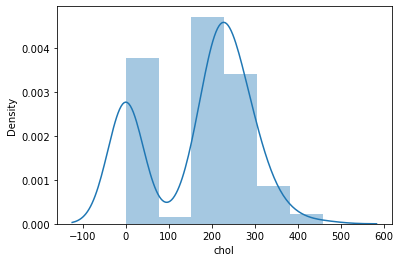

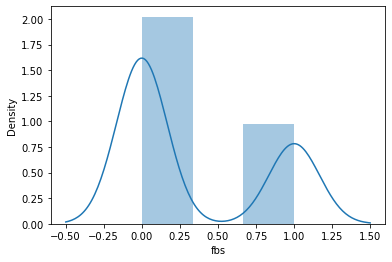

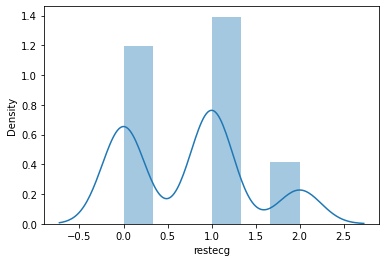

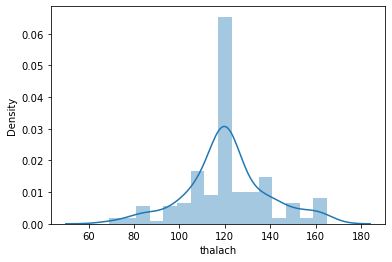

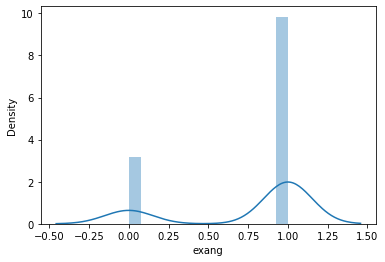

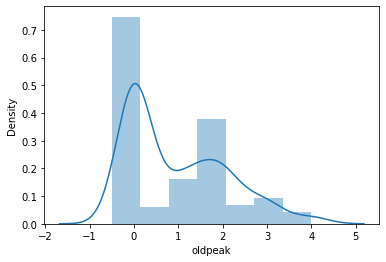

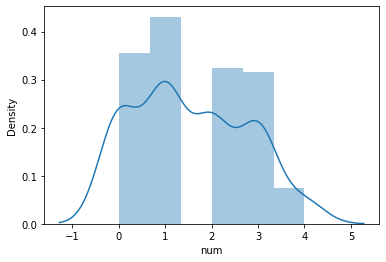

In [16]:
for i in df2.columns:
    plt.figure
    sns.distplot(df2[i])
    plt.show()

since there is only one unique (1) left in 'sex' column, we can drop it 

In [17]:
df2.drop('sex',axis=1,inplace=True)

In [20]:
df2.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,63.0,4.0,140.0,260.0,0.0,1.0,112.0,1.0,3.0,2.0
1,44.0,4.0,130.0,209.0,0.0,1.0,127.0,0.0,0.0,0.0
2,60.0,4.0,132.0,218.0,0.0,1.0,140.0,1.0,1.5,2.0
3,55.0,4.0,142.0,228.0,0.0,1.0,149.0,1.0,2.5,1.0
4,66.0,3.0,110.0,213.0,1.0,2.0,99.0,1.0,1.3,0.0


In [23]:
df2['num'].replace([2,3,4],1, inplace=True)

In [24]:
df2['num'].unique()

array([1., 0.])

In [38]:
for i in df2.columns:
    a=df[i].value_counts()
    print(i)
    print(a)

age
63.0    15
62.0    15
55.0    14
58.0    12
60.0    12
61.0    12
57.0    10
56.0     9
64.0     9
69.0     8
59.0     8
54.0     7
51.0     7
65.0     6
67.0     5
74.0     5
53.0     5
68.0     4
48.0     4
72.0     3
75.0     3
66.0     3
46.0     2
71.0     2
50.0     2
52.0     2
40.0     2
41.0     2
49.0     2
77.0     1
45.0     1
38.0     1
76.0     1
42.0     1
35.0     1
70.0     1
43.0     1
44.0     1
37.0     1
Name: age, dtype: int64
cp
4.0    131
3.0     47
2.0     14
1.0      8
Name: cp, dtype: int64
trestbps
120.0    72
130.0    15
140.0    10
110.0     9
150.0     9
160.0     8
122.0     6
142.0     5
170.0     4
136.0     4
134.0     4
124.0     4
126.0     4
128.0     4
144.0     4
158.0     3
132.0     3
152.0     2
116.0     2
154.0     2
180.0     2
125.0     2
138.0     2
155.0     2
112.0     2
104.0     2
114.0     1
172.0     1
190.0     1
100.0     1
118.0     1
156.0     1
102.0     1
96.0      1
106.0     1
135.0     1
146.0     1
178.0     1
0.0     

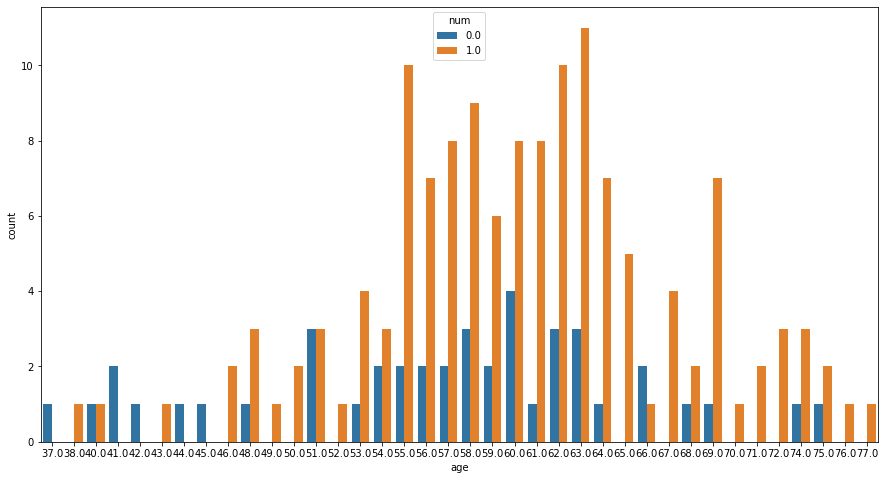

In [31]:
plt.figure(figsize=(15,8))
sns.countplot(x='age',hue='num',data=df2)
plt.show()

he can interpret that at younger age changes for heart disease is low. 

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x='age',hue='num',data=df2)
plt.show()

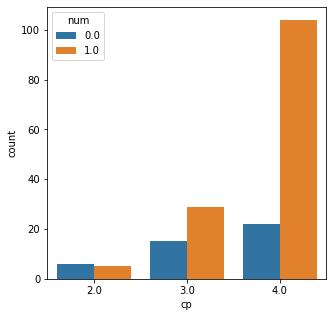

In [33]:
plt.figure(figsize=(5,5))
sns.countplot(x='cp',hue='num',data=df2)
plt.show()

In [ ]:
we can interpret patience have type 4 of CP have more chances to get heart disease.

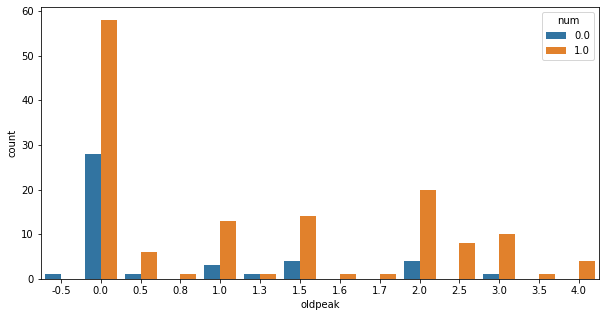

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(x='oldpeak',hue='num',data=df2)
plt.show()

with the increase of oldpeak value , probability of heart diseases increases.

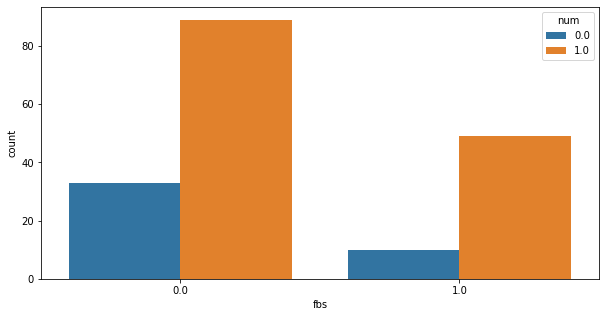

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(x='fbs',hue='num',data=df2)
plt.show()

In [ ]:
We can observe patience have more fasting sugar level, tend to have more chances to get heart disease.

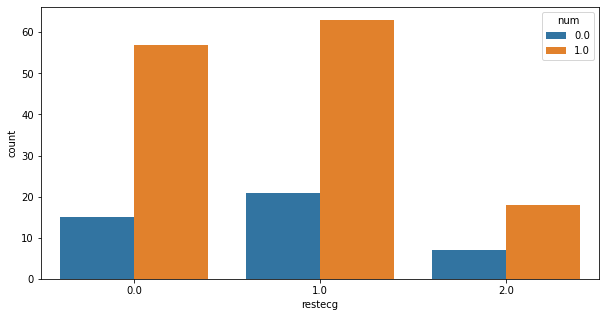

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(x='restecg',hue='num',data=df2)
plt.show()

with the increase of restecg, chances for heart diseases increases.

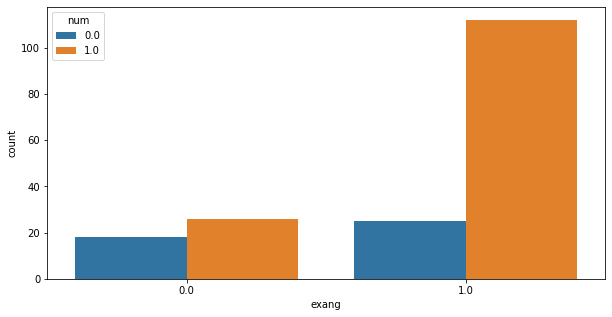

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(x='exang',hue='num',data=df2)
plt.show()

Exercise induced angina is seen more in patience having heart problem.

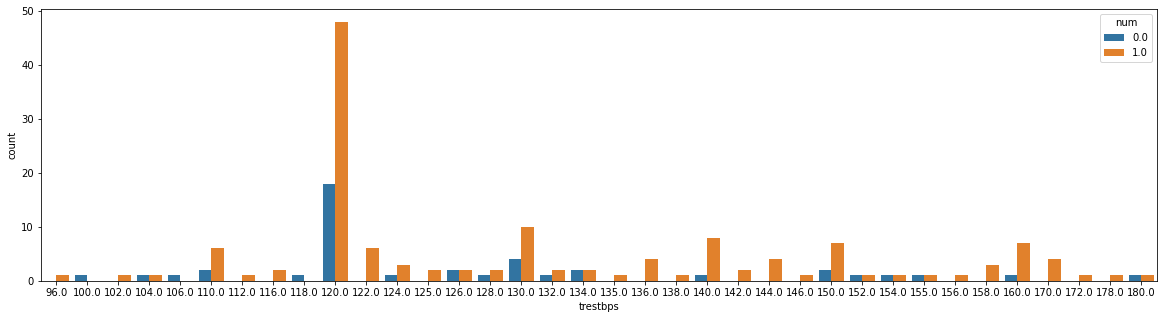

In [44]:
plt.figure(figsize=(20,5))
sns.countplot(x='trestbps',hue='num',data=df2)
plt.show()

Patience having high trestbps(Resting blood pressure) tends to have more chances of Heart diseases

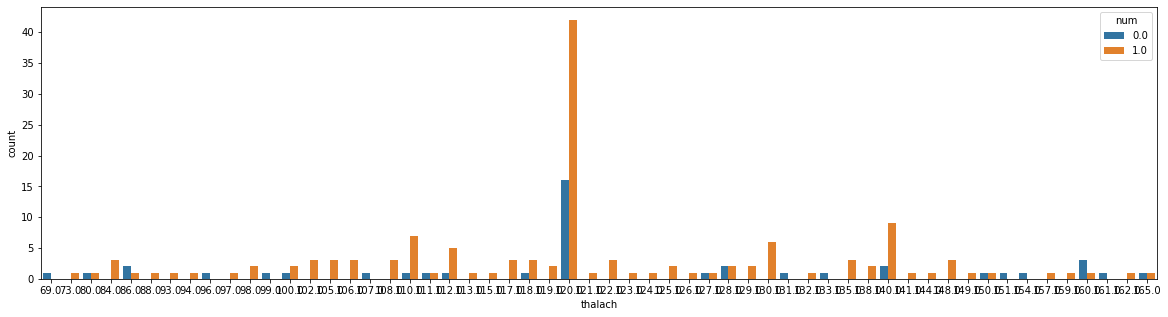

In [45]:
plt.figure(figsize=(20,5))
sns.countplot(x='thalach',hue='num',data=df2)
plt.show()

Diseas disease is shown in both high and low thalach.

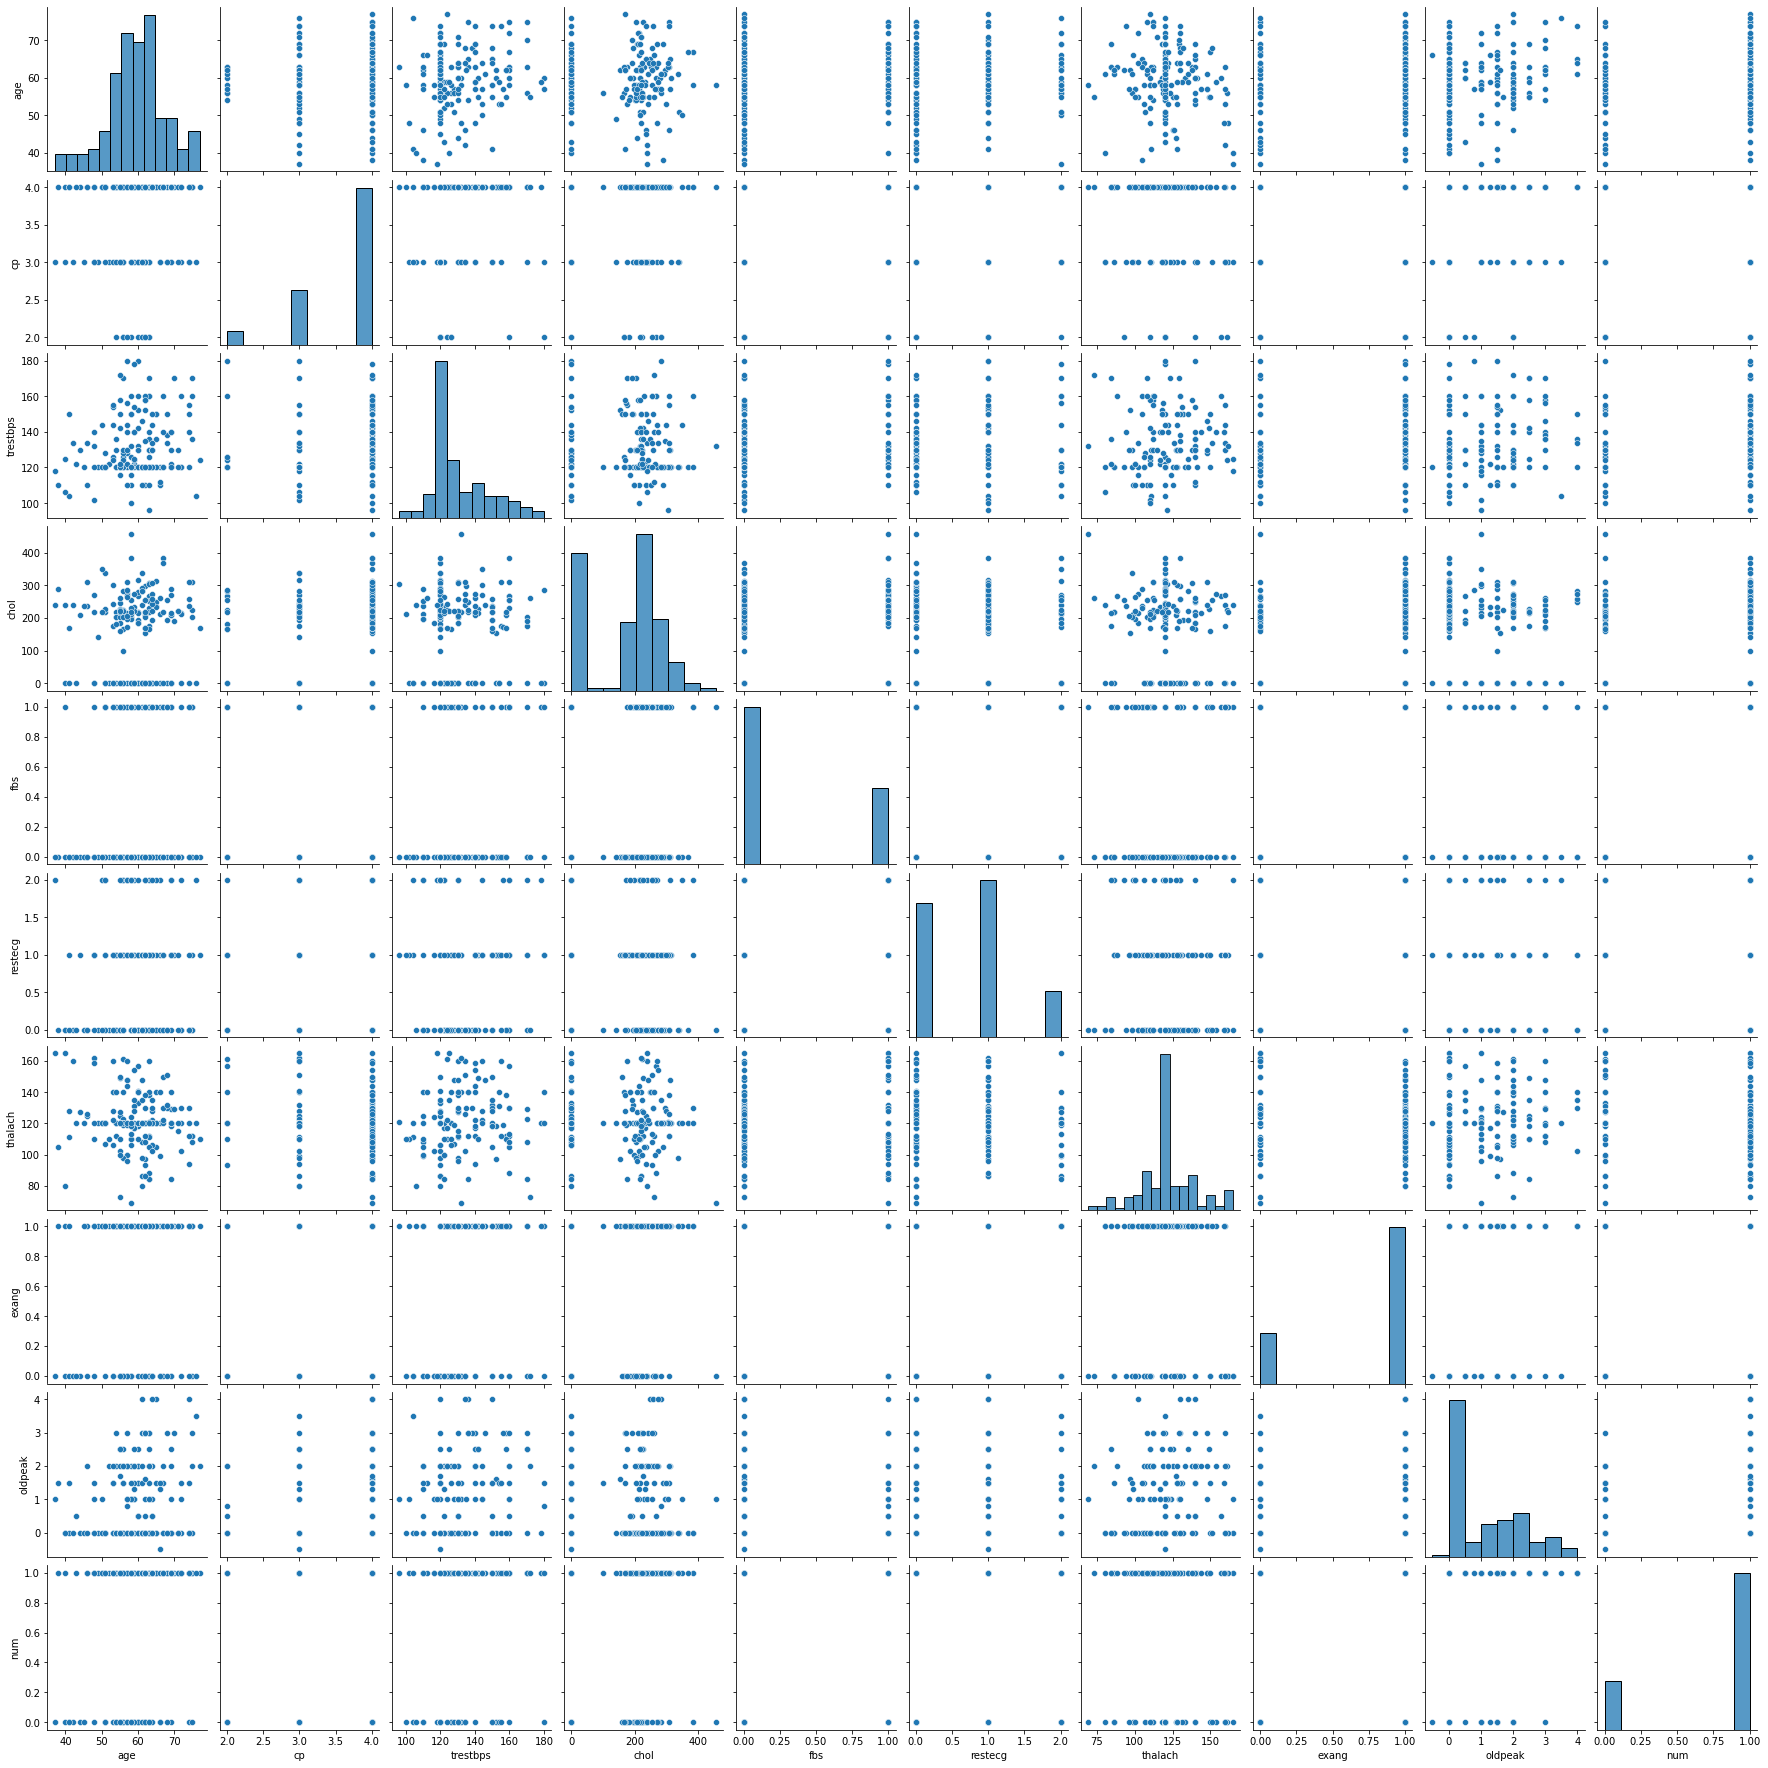

In [48]:
sns.pairplot(df2)

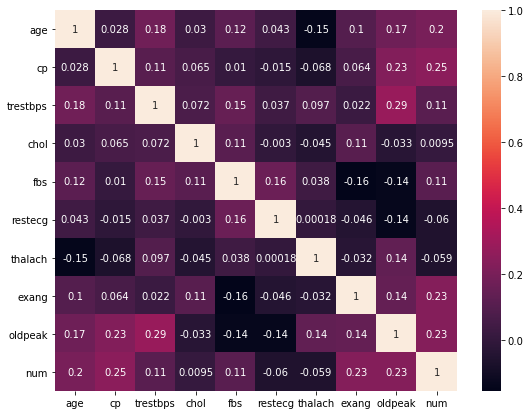

In [66]:
plt.figure(figsize=(9,7))
sns.heatmap(df2.corr(), annot=True)
plt.show()

In [67]:
df2.drop('chol',axis=1,inplace=True)
df2.head()

,age,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,num
0,63.0,4.0,140.0,0.0,1.0,112.0,1.0,3.0,1.0
1,44.0,4.0,130.0,0.0,1.0,127.0,0.0,0.0,0.0
2,60.0,4.0,132.0,0.0,1.0,140.0,1.0,1.5,1.0
3,55.0,4.0,142.0,0.0,1.0,149.0,1.0,2.5,1.0
4,66.0,3.0,110.0,1.0,2.0,99.0,1.0,1.3,0.0


In [68]:
x=df2.drop(['num'],axis=1)
x.head(5)

,age,cp,trestbps,fbs,restecg,thalach,exang,oldpeak
0,63.0,4.0,140.0,0.0,1.0,112.0,1.0,3.0
1,44.0,4.0,130.0,0.0,1.0,127.0,0.0,0.0
2,60.0,4.0,132.0,0.0,1.0,140.0,1.0,1.5
3,55.0,4.0,142.0,0.0,1.0,149.0,1.0,2.5
4,66.0,3.0,110.0,1.0,2.0,99.0,1.0,1.3


In [69]:
x.shape

(181, 8)

In [70]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.46233337,  0.61353554,  0.55608727, ..., -0.49986524,
         0.56671676,  1.83867313],
       [-1.9989119 ,  0.61353554, -0.03843013, ...,  0.33838932,
        -1.7645499 , -0.8611633 ],
       [ 0.07371569,  0.61353554,  0.08047335, ...,  1.06487659,
         0.56671676,  0.48875492],
       ...,
       [-0.57398043,  0.61353554, -0.51404405, ..., -1.17046888,
        -1.7645499 , -0.8611633 ],
       [-0.18536276,  0.61353554, -0.63294753, ..., -0.05279614,
         0.56671676, -0.8611633 ],
       [ 0.33279414, -2.75161392, -0.63294753, ..., -1.56165434,
         0.56671676, -0.8611633 ]])

In [71]:
y=df2['num']
y

0      1.0
1      0.0
2      1.0
3      1.0
4      0.0
      ... 
193    1.0
194    1.0
197    1.0
198    0.0
199    1.0
Name: num, Length: 181, dtype: float64

In [72]:
y.shape

(181,)

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score

In [74]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, random_state=42)

LogisticRegression()
Accuracy score : 0.7297297297297297
Confusion matrix :
 [[ 2  8]
 [ 2 25]]
Classification report: 
                precision    recall  f1-score   support

         0.0       0.50      0.20      0.29        10
         1.0       0.76      0.93      0.83        27

    accuracy                           0.73        37
   macro avg       0.63      0.56      0.56        37
weighted avg       0.69      0.73      0.69        37

*************************************************




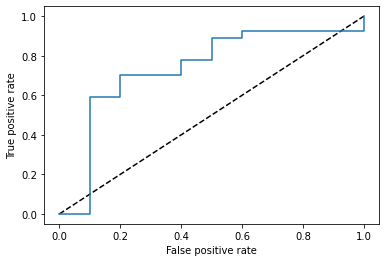

DecisionTreeClassifier()
Accuracy score : 0.6486486486486487
Confusion matrix :
 [[ 4  6]
 [ 7 20]]
Classification report: 
                precision    recall  f1-score   support

         0.0       0.36      0.40      0.38        10
         1.0       0.77      0.74      0.75        27

    accuracy                           0.65        37
   macro avg       0.57      0.57      0.57        37
weighted avg       0.66      0.65      0.65        37

*************************************************




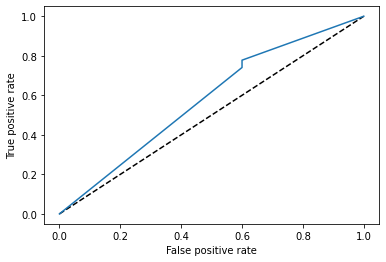

KNeighborsClassifier()
Accuracy score : 0.7027027027027027
Confusion matrix :
 [[ 1  9]
 [ 2 25]]
Classification report: 
                precision    recall  f1-score   support

         0.0       0.33      0.10      0.15        10
         1.0       0.74      0.93      0.82        27

    accuracy                           0.70        37
   macro avg       0.53      0.51      0.49        37
weighted avg       0.63      0.70      0.64        37

*************************************************




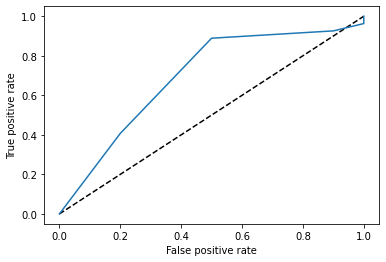

In [75]:
model=[LogisticRegression(),DecisionTreeClassifier(), KNeighborsClassifier()]
for i in model:
    print(i)
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    y_pred_pro=i.predict_proba(x_test)[:,1]
    fpr,tpr,thresholds=roc_curve(y_test,y_pred_pro)
    print('Accuracy score :', accuracy_score(y_test,pred))
    print('Confusion matrix :\n', confusion_matrix(y_test,pred))
    print('Classification report: \n ', classification_report(y_test,pred))
    print('*************************************************')
    print('\n')
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label='KNeighborClassifier')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.show()

Accuracy score : 0.6756756756756757
Confusion matrix :
 [[ 0 10]
 [ 2 25]]
Classification report: 
                precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        10
         1.0       0.71      0.93      0.81        27

    accuracy                           0.68        37
   macro avg       0.36      0.46      0.40        37
weighted avg       0.52      0.68      0.59        37



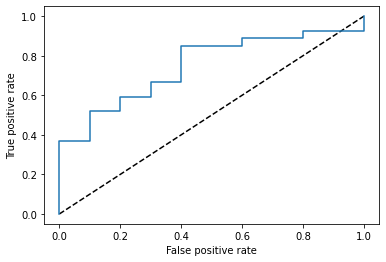

In [61]:
    svc=SVC(probability=True)
    svc.fit(x_train,y_train)
    pred=svc.predict(x_test)
    y_pred_pro=svc.predict_proba(x_test)[:,1]
    fpr,tpr,thresholds=roc_curve(y_test,y_pred_pro)
    print('Accuracy score :', accuracy_score(y_test,pred))
    print('Confusion matrix :\n', confusion_matrix(y_test,pred))
    print('Classification report: \n ', classification_report(y_test,pred))
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label='KNeighborClassifier')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.show()

# ENSEMBLE TECHNIQUE

In [76]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred2=rf.predict(x_test)
print('Accuracy score :', accuracy_score(y_test,pred))
print('Confusion matrix :\n', confusion_matrix(y_test,pred2))
print('Classification report: \n ', classification_report(y_test,pred2))

Accuracy score : 0.7027027027027027
Confusion matrix :
 [[ 1  9]
 [ 2 25]]
Classification report: 
                precision    recall  f1-score   support

         0.0       0.33      0.10      0.15        10
         1.0       0.74      0.93      0.82        27

    accuracy                           0.70        37
   macro avg       0.53      0.51      0.49        37
weighted avg       0.63      0.70      0.64        37



# Hyperparameter Tunning

In [81]:
from sklearn.model_selection import GridSearchCV
parameters = {'C':[1,10],'random_state': range(42,100)}
lg=LogisticRegression()
Grid=GridSearchCV(lg,parameters)
Grid.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 10], 'random_state': range(42, 100)})

In [82]:
Grid.best_params_

{'C': 1, 'random_state': 42}

Since it is the default parameters, we will that only.

In [83]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred3=lg.predict(x_test)

# Saving the best model

In [84]:
import joblib

In [85]:
joblib.dump(lg,'Heart_Disease.pkl')

['Heart_Disease.pkl']